# EDM 2021: Early Warning Prediction in Flipped Classrooms

In [158]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [160]:
from helper.hcourse import init_courses
from helper.hplotting import *

## ** Data Preparation **

In [43]:
courses = init_courses({'types': ['flipped-classroom'], 'load': True, 'label': True})

In [44]:
for c, course in enumerate(courses):
    print(c, course)

0 ID: EPFL-AlgebreLineaire-2018 Type: flipped-classroom Title: Algebre lineaire (classe inversee) Students: 104
1 ID: EPFL-AlgebreLineaire-2019 Type: flipped-classroom Title: Algebre lineaire (classe inversee) Students: 110
2 ID: EPFL-CS-206-2019_T1 Type: flipped-classroom Title: Parallelism and concurrency Students: 148
3 ID: EPFL-CS-210-2018_t3 Type: flipped-classroom Title: Functional programming Students: 218


In [84]:
course = courses[0] + courses[1]

In [54]:
course = courses[2]

In [85]:
print(course)

ID: EPFL-AlgebreLineaire Type: flipped-classroom Title: Algebre lineaire (classe inversee) Students: 214


## ** Data Exploration ** 

#### Grades and labels analysis

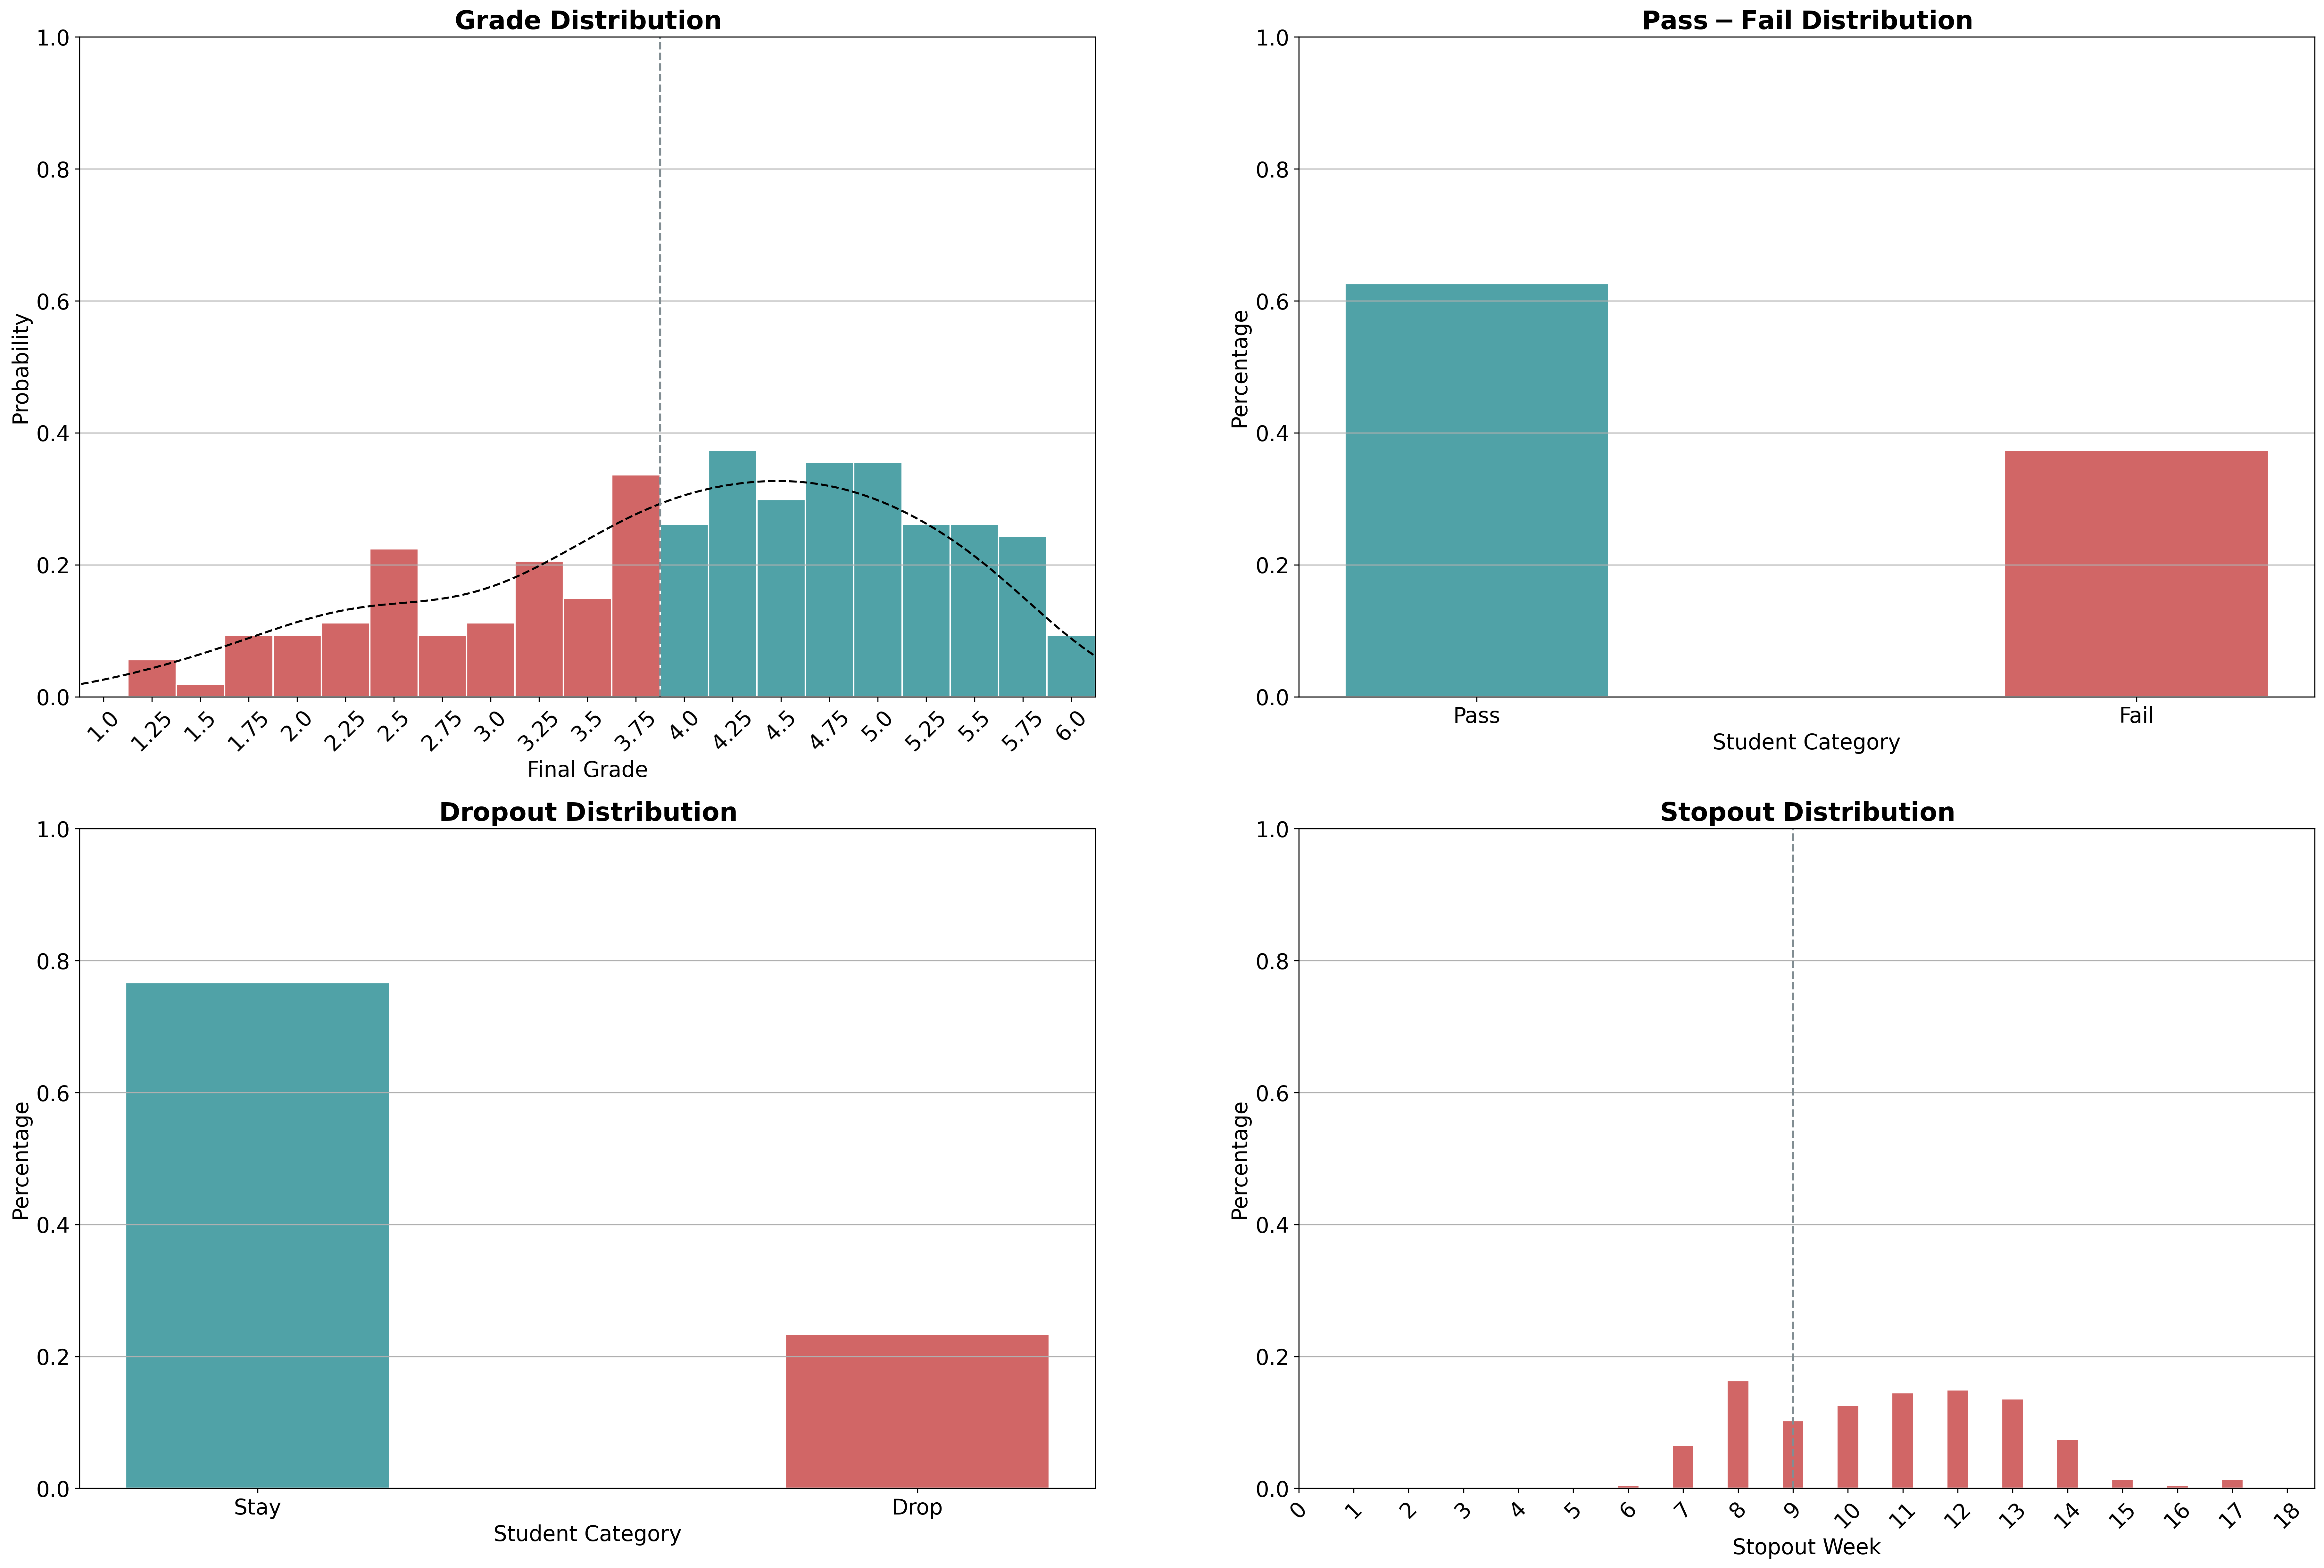

In [86]:
plt.figure(figsize=(30, 20), dpi=300)
plt.rcParams.update({'font.size': 16})

plt.subplot(2, 2, 1)
plot_grade_distribution(course, mingrade=1, maxgrade=6, depgrade=.25, thrgrade=4.0)

plt.subplot(2, 2, 2)
plot_pass_fail_distribution(course)

plt.subplot(2, 2, 3)
plot_dropout_distribution(course)

plt.subplot(2, 2, 4)
plot_stopout_distribution(course)

## ** Experimental Evaluation ** 

### Feature Set Evaluation
- Akpinar, N. J., Ramdas, A., & Acar, U. (2020). Analyzing Student Strategies In Blended Courses Using Clickstream Data. EDM.
- Boroujeni, M. S., Sharma, K., Kidziński, Ł., Lucignano, L., & Dillenbourg, P. (2016). How to quantify student’s regularity? EC-TEL.
- Chen, F., & Cui, Y. (2020). Utilizing Student Time Series Behaviour in Learning Management Systems for Early Prediction of Course Performance. JoLA.
- He, H., Zheng, Q., Dong, B., & Yu, H. (2018). Measuring Student's Utilization of Video Resources and Its Effect on Academic Performance. ICALT. 
- Lallé, S., & Conati, C. (2020). A Data-Driven Student Model to Provide Adaptive Support During Video Watching Across MOOCs. AIED. 
- Lemay, D. J., & Doleck, T. (2020). Grade prediction of weekly assignments in MOOCS: mining video-viewing behavior. EIT. 
- Mbouzao, B., Desmarais, M. C., & Shrier, I. (2020). Early Prediction of Success in MOOC from Video Interaction Features. AIED. 
- Mubarak, A. A., Cao, H., & Ahmed, S. A. (2020). Predictive learning analytics using deep learning model in MOOCs’ courses videos. EIT. 
- Wan, H., Liu, K., Yu, Q., & Gao, X. (2019). Pedagogical Intervention Practices: Improving Learning Engagement Based on Early Prediction. IEEE TLT. 

RQ1.1: Which **feature set** is the best at predicting the **pass/fail** of the student for **a given model** over time?


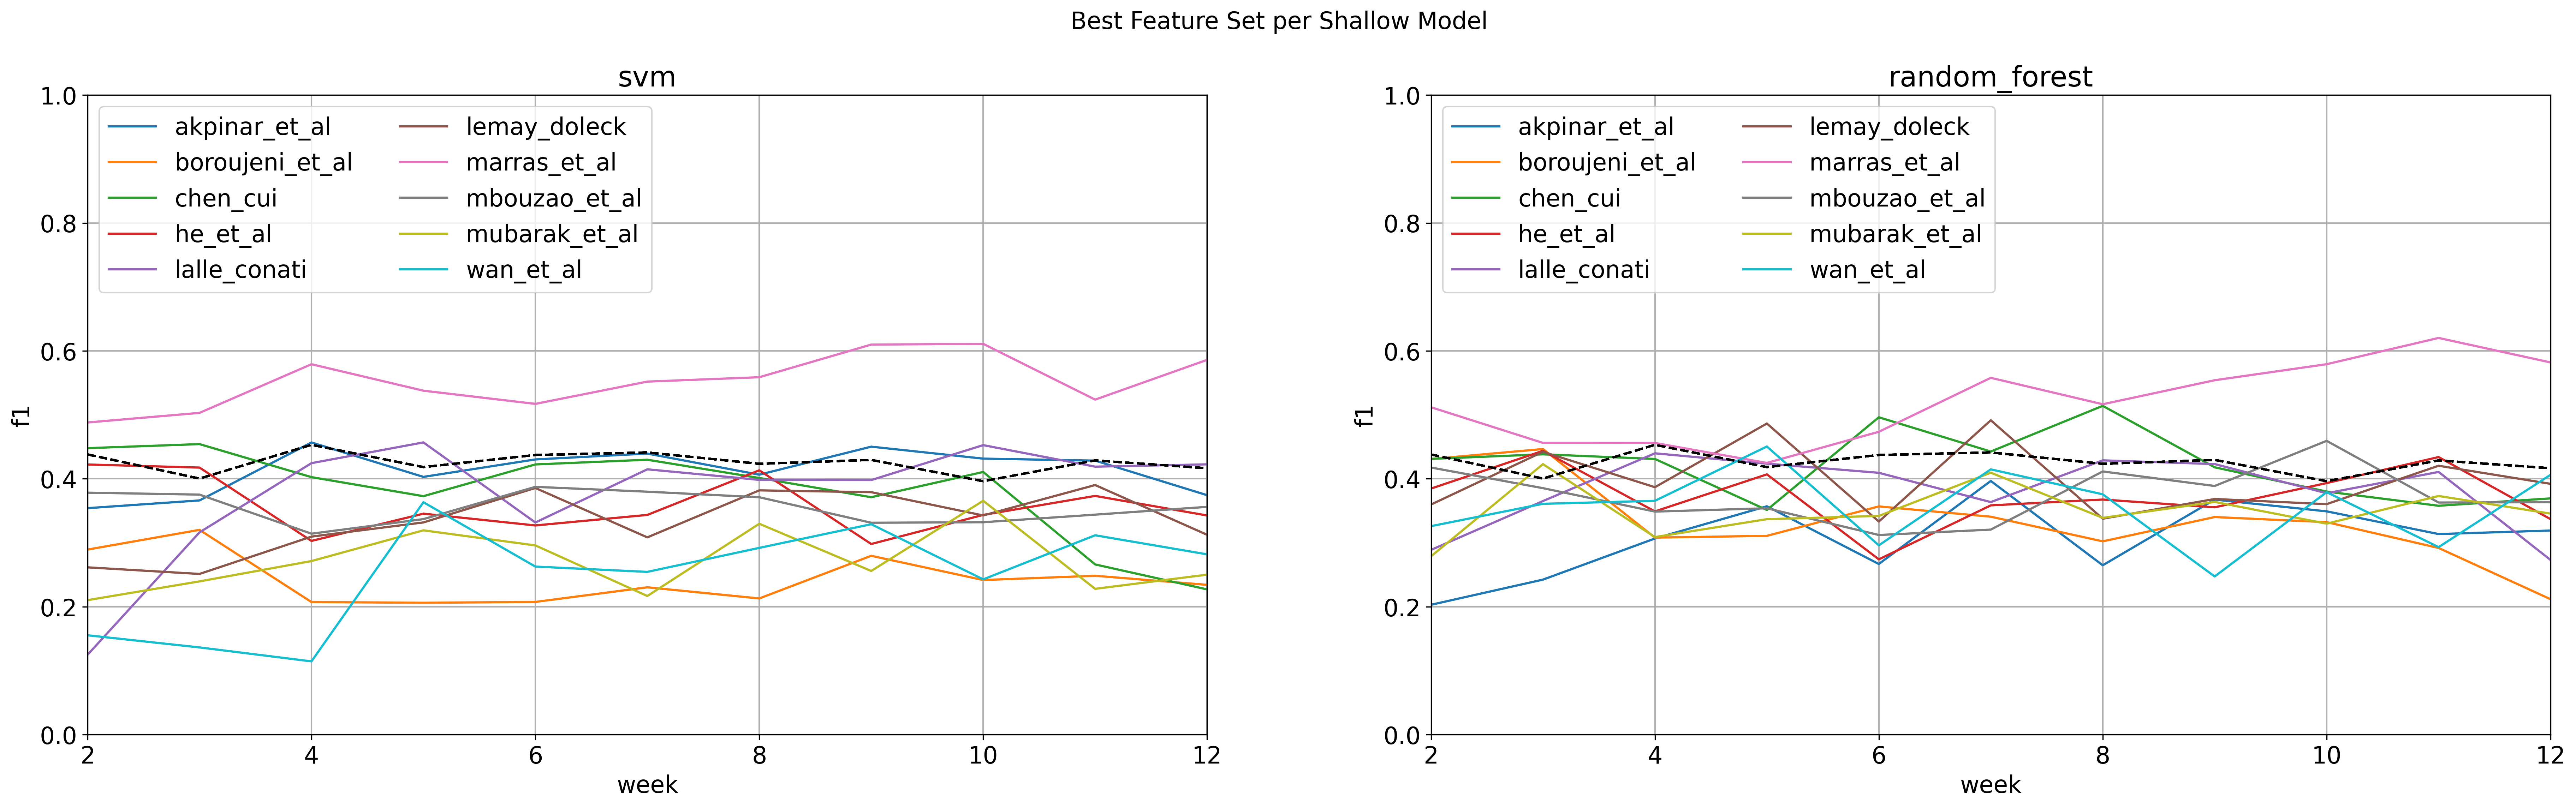

In [178]:
plot_feature_per_model('eq_week', 'label_pass_fail', 'epfl_algebrelineaire', 'f1')

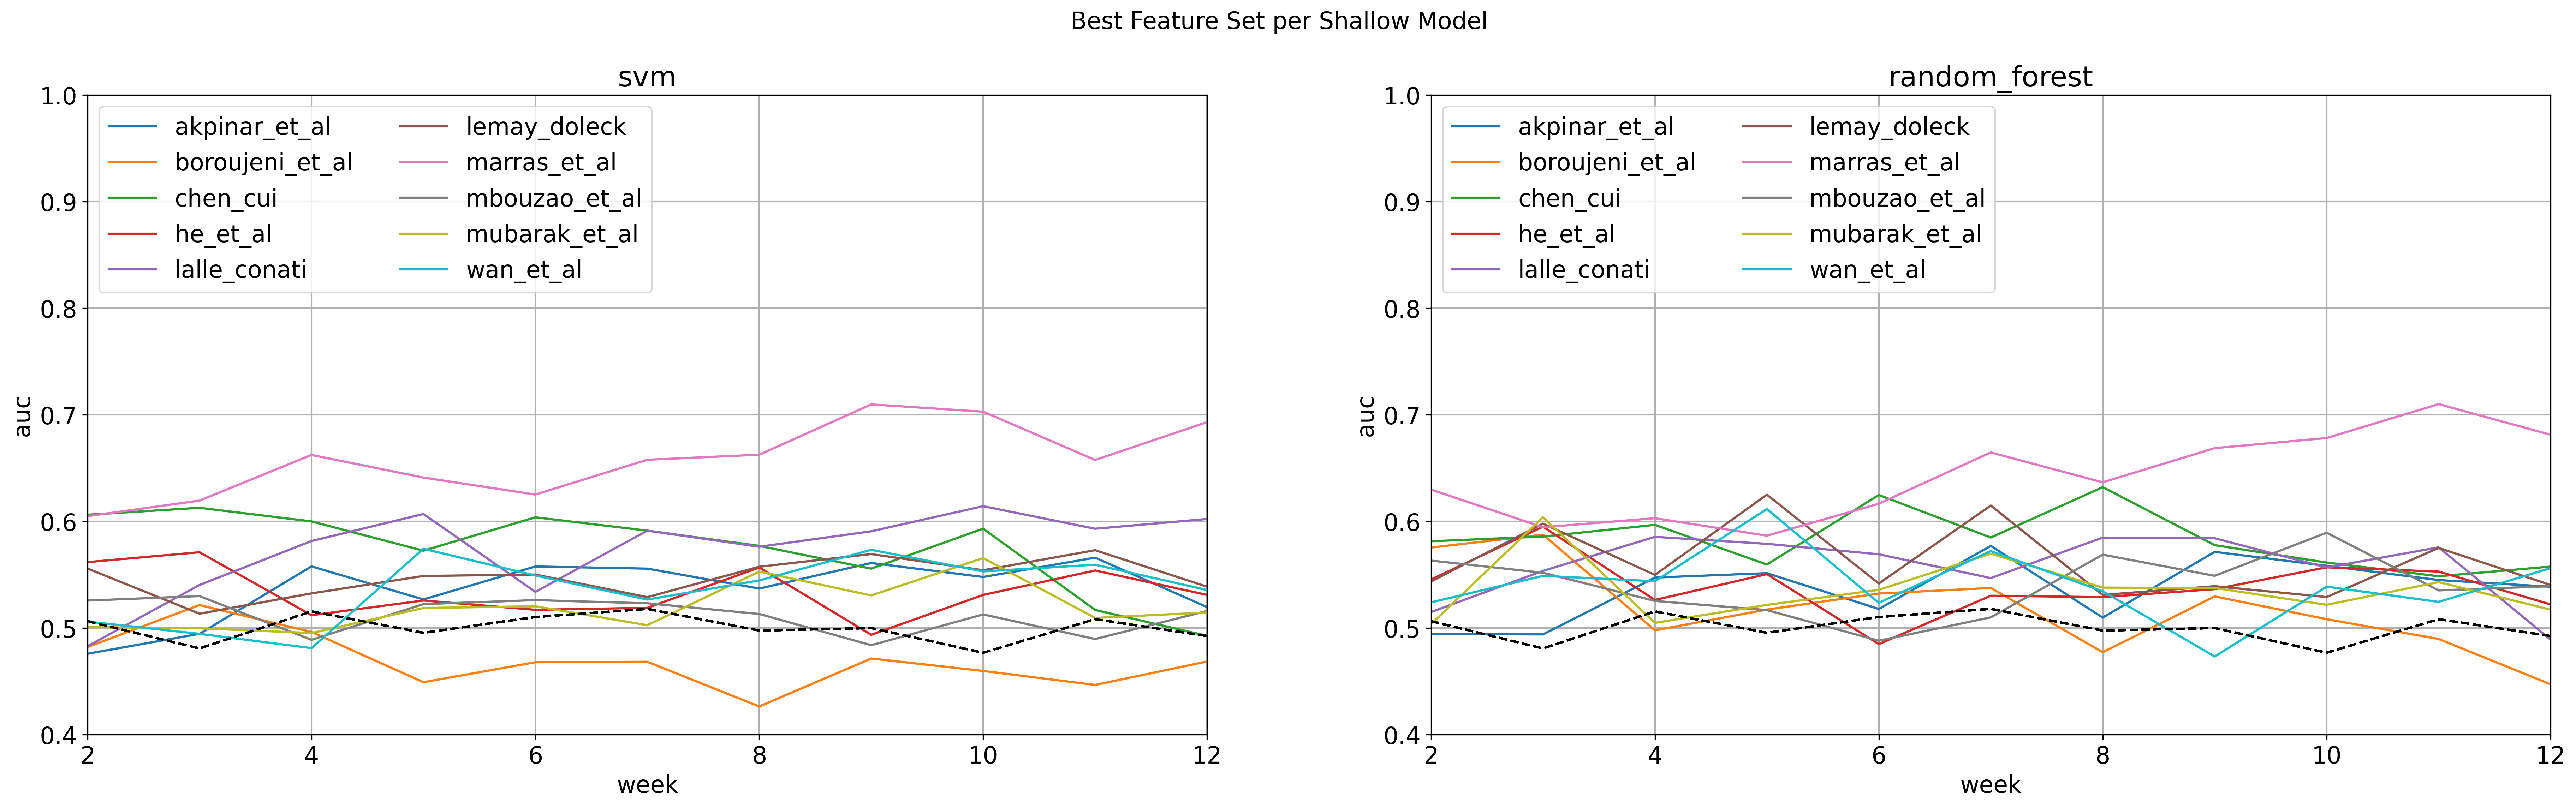

In [177]:
plot_feature_per_model('eq_week', 'label_pass_fail', 'epfl_algebrelineaire', 'auc', [.4, 1.])

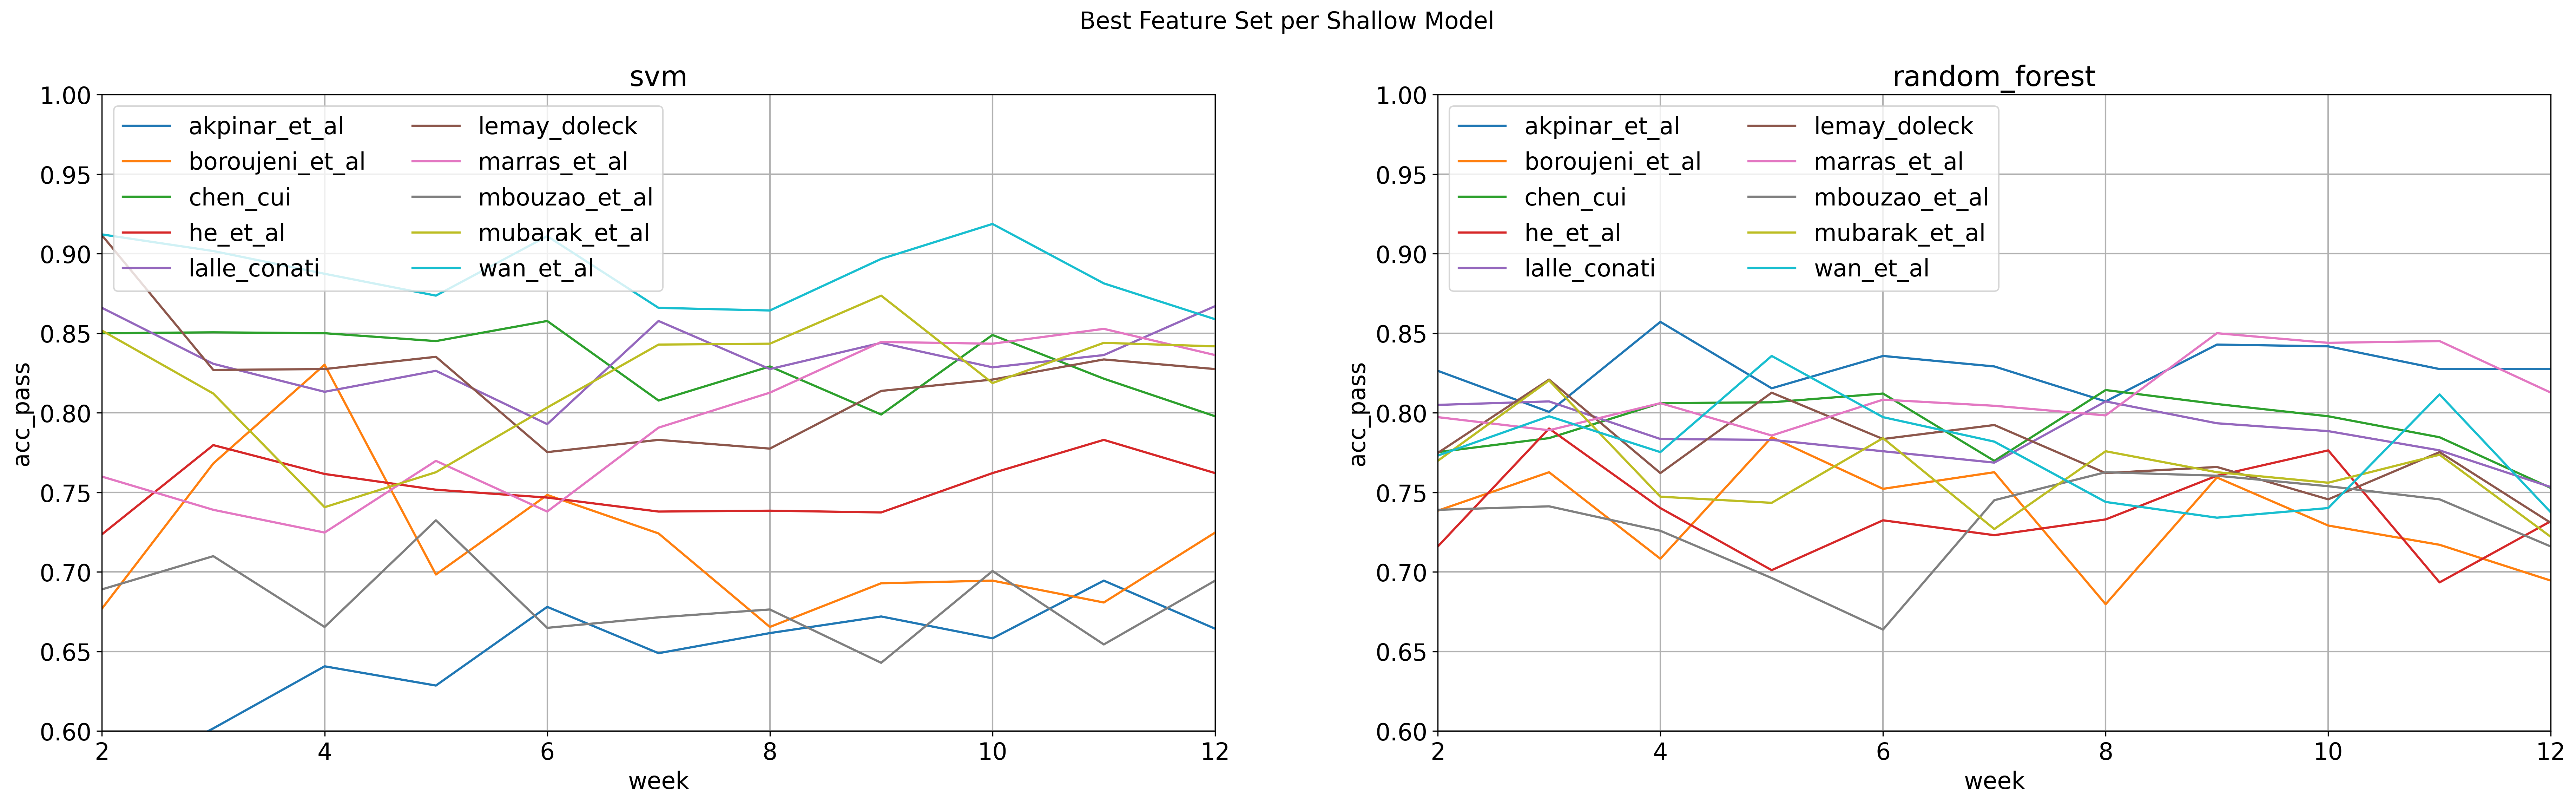

In [175]:
plot_feature_per_model('eq_week', 'label_pass_fail', 'epfl_algebrelineaire', 'acc_pass', [.6, 1])

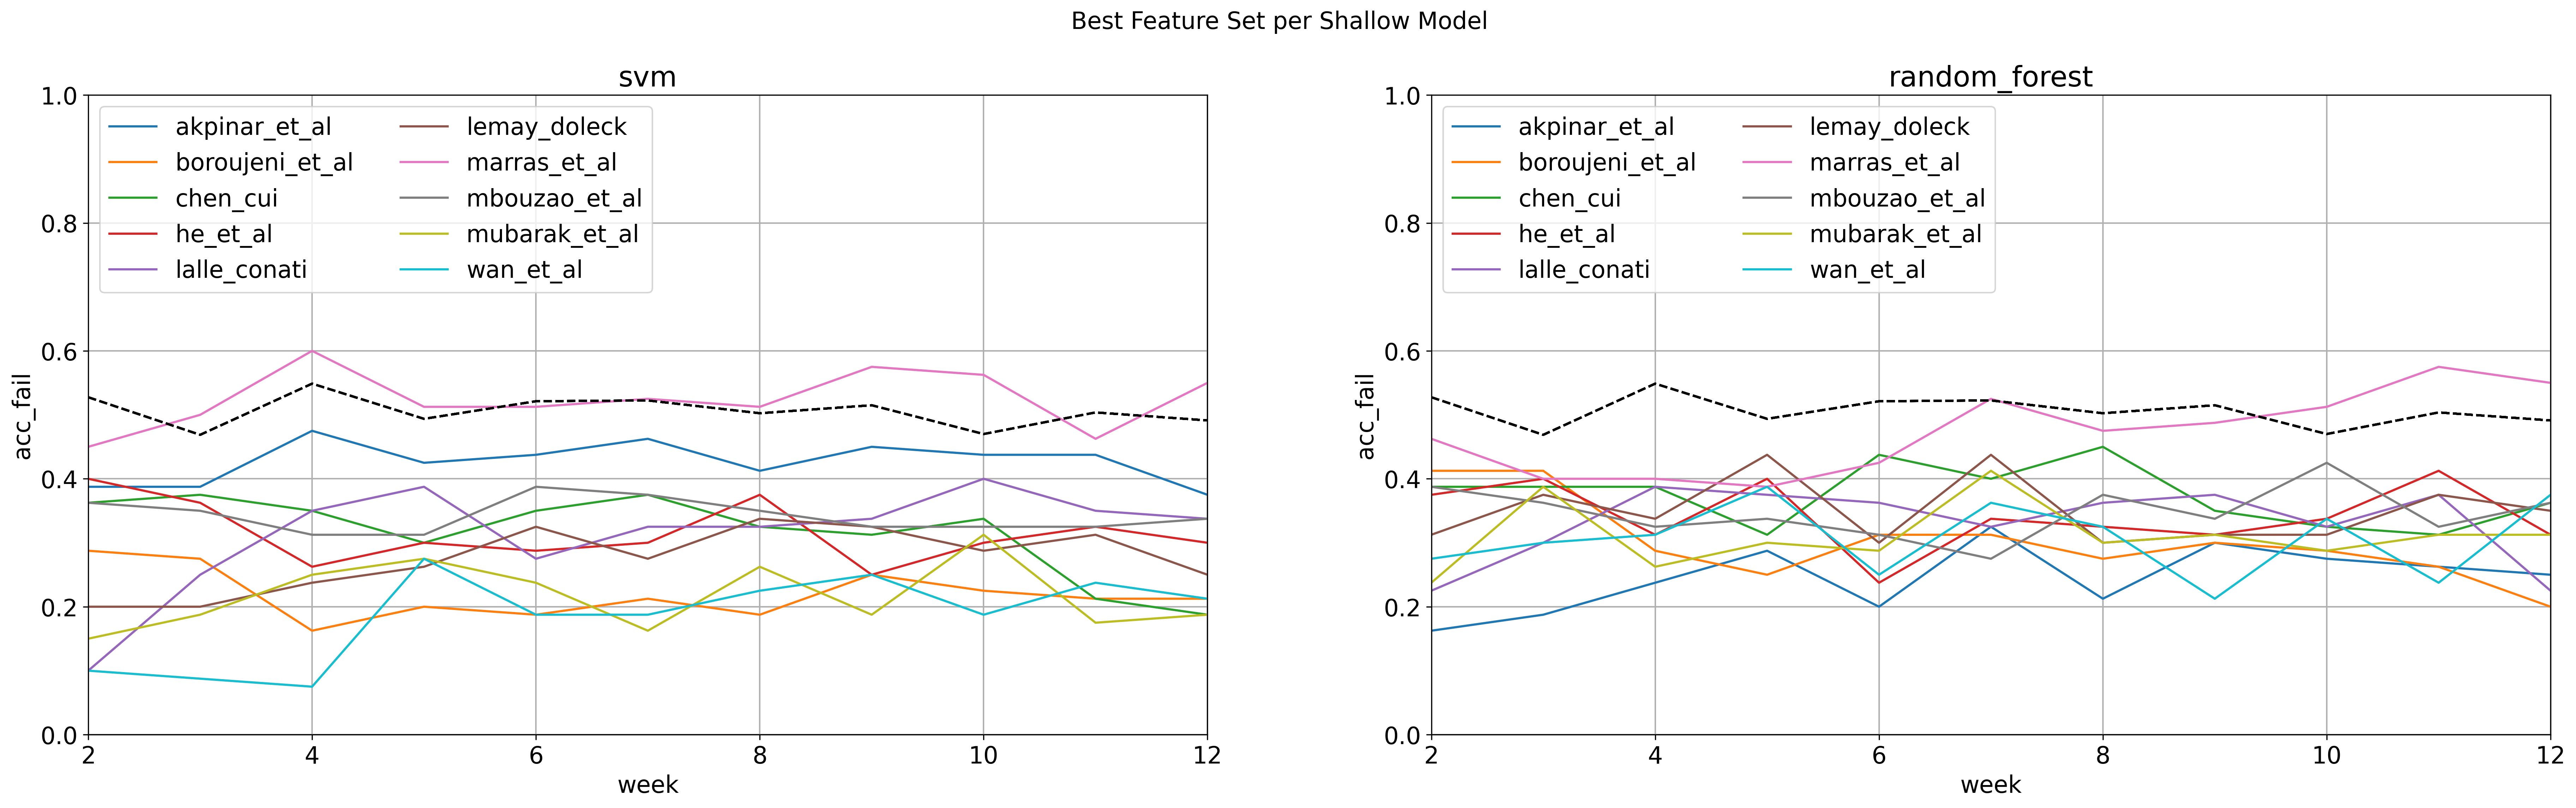

In [176]:
plot_feature_per_model('eq_week', 'label_pass_fail', 'epfl_algebrelineaire', 'acc_fail')

RQ1.2: Which **feature set** is the best at predicting the **garde** of the student for **a given model** over time?


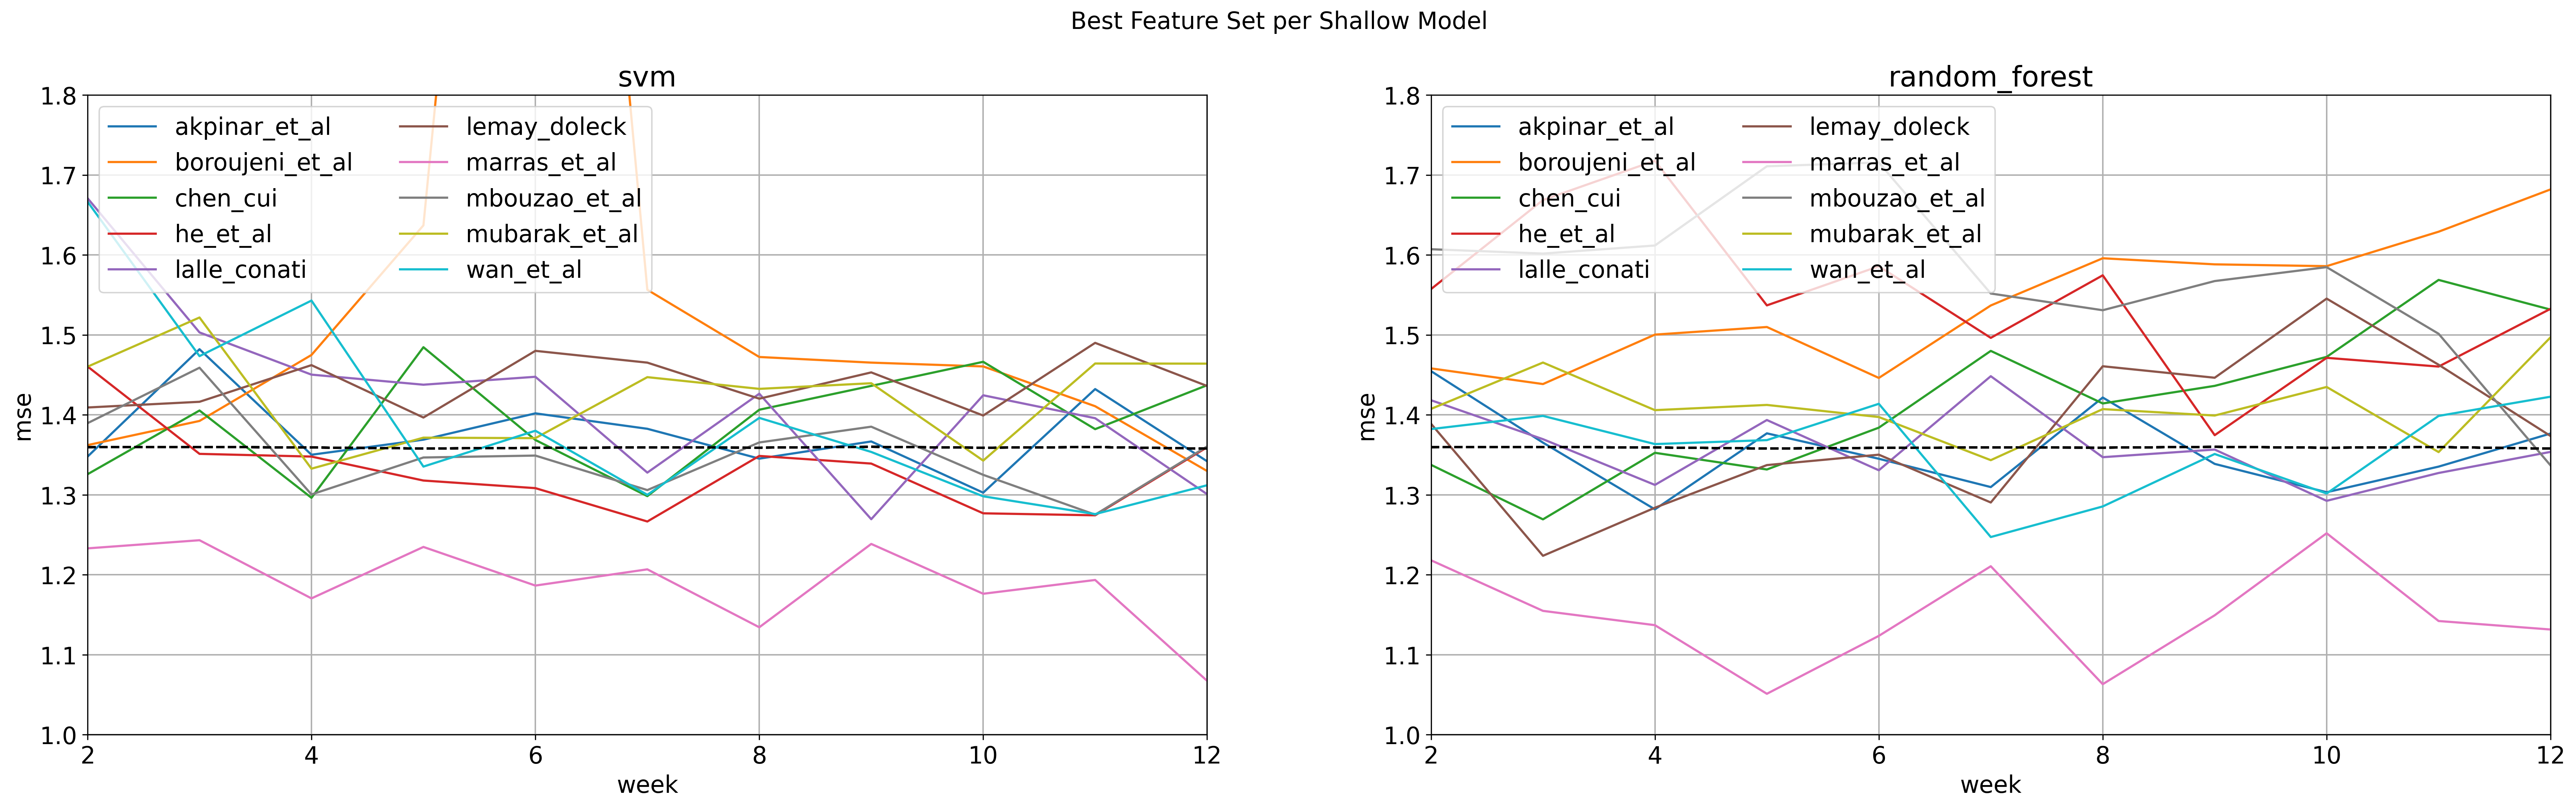

In [179]:
plot_feature_per_model('eq_week', 'label_grade', 'epfl_algebrelineaire', 'mse', [1, 1.8])

### Model Evaluation

- SVM: Support Vector Machines. 
- Random Forest**.
- LSTM: Long Short-Term Memory. 
- LSTMAtt: LSTM + Attention.

RQ2.1: Which **model** is the best at predicting the **pass/fail** of the student over time, with our features?

RQ2.2: Which **model** is the best at predicting the **grade** of the student over time, with our features?